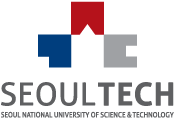

# Lab Session # 1: NumPy & pandas
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Learning Objectives
- Understand **why** we use NumPy (arrays) and pandas (tabular data).
- Use essential **NumPy** concepts: array creation, shapes, indexing/slicing, basic operations.
- Use **pandas** for real quick data exploration.

<img src="https://miro.medium.com/max/2400/0*eNwKHW934I1awMzH.png" width="200"/>
</div>

# Session 1 — NumPy Essentials

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are **vectorized** (formulated with vectors and matrices), the performance is very good.

To use `numpy` you need to import the module. By convention, the NumPy module imported under the alias np, like so::

```python
import numpy as np
```

After this, we can access functions and classes in the numpy module using the np namespace.

Let's import numpy




### NumPy arrays
In the numpy package the terminology used for vectors, matrices and higher-dimensional data sets is *array*.

But first, what is an array? Let's refresh a bit.

In computer science, an array data structure, or simply an array, is a data structure consisting of a collection of elements, each identified by at least one array index or key.


![](https://i.imgur.com/mg8O3kd.png)

NumPy provides the **ndarray** (n‑dimensional array) which is a fast, contiguous, homogeneous container for numbers.
We cover only the **basics** that directly help when working with pandas:
- Arrays vs Python lists
- Creating arrays: `np.array`, `np.arange`, `np.linspace`
- Inspecting shape & dtype: `.shape`, `.reshape`, `.dtype`
- Indexing & slicing
- Basic operations: `sum`, `mean`, broadcasting


### Arrays vs Lists
- **List**: general-purpose Python container (can hold mixed types), slower for numeric operations.
- **NumPy array**: fixed-type, efficient numeric container; supports vectorized operations.


In [ ]:
# List vs array example
py_list = [1, 2, 3, 4, 5]
np_array = np.array([1, 2, 3, 4, 5])

print("Python list * 2:", py_list * 2)        # list repetition
print("NumPy array * 2:", np_array * 2)       # elementwise multiplication


### Creating Arrays
Common constructors you'll see used within pandas internals or when preparing data:
- `np.array([...])`  
- `np.arange(start, stop, step)` _The interval does not include the stop_ value,  
- `np.linspace(start, stop, num_points)`  _using linspace, both end points ARE included_
- `np.random.rand(d0,d1,...)`
- `np.zeros(dimension)`
- `np.ones(dimension)`

In [ ]:
a = np.array([10, 20, 30])
b = np.arange(0, 10, 2)       # 0, 2, 4, 6, 8
c = np.linspace(0, 1, 5)      # 0.00, 0.25, 0.50, 0.75, 1.00
d = np.random.rand(5)
e = np.random.rand(5,3)
f = np.zeros(5)
g = np.ones((3,2))

print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)
print("e:", e)
print("f:", f)
print("g:", g)

Experiment yourself changing the value of the parameters and create different arrays

### Inspecting Arrays
Arrays have **shape** and **dtype**. You can **reshape** without copying when compatible.


In [ ]:
m = np.arange(1, 13)         # 1..12
print("m:", m)
print("m.shape:", m.shape, "| dtype:", m.dtype)

M = m.reshape(3, 4)
print("M:\n", M)
print("M.shape:", M.shape)


Experiment yourself reshaping the arrays you created before and checking the new shape and the dtype

### Indexing & Slicing

We can index elements in an array using square brackets and indices:

```python
# vec is a vector, and has only one dimension, taking one index
vec[0]

# mat is a matrix, or a 2 dimensional array, taking two indices
mat[1,1]
mat[1][1]
```

Thus is similar to lists, but extended to multiple dimensions.


If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)

```python
mat[1]  # row 1
```

The same thing can be achieved with using `:` instead of an index:

```python
mat[1,:] # row 1
mat[0,:] # row 0
mat[:,1] # column 1
```

In [ ]:
M = np.arange(1, 13).reshape(3, 4)
print("M:\n", M)
print("M[0, 0] ->", M[0, 0])      # first row, first col
print("M[:, 1] ->", M[:, 1])      # all rows, second col
print("M[2, :] ->", M[:, 1])      # third row, all cols



Index slicing is the technical name for the syntax `mat[lower:upper:step]` to extract part of an array:

Let's create the following array:

```python
a = np.array([1,2,3,4,5])
```

After that, let's try the previous sintax as follows:

```python
a[1:3]  # array([2, 3])
```


In [ ]:
print("M[1:, 2:] ->\n", M[1:, 2:])  # rows 1..end, cols 2..end

We can omit any of the three parameters in `M[lower:upper:step]`:

```python
a[::] # lower, upper, step all take the default values
a[::2] # step is 2, lower and upper defaults to the beginning and end of the array
a[:3] # first three elements
a[3:] # elements from index 3
```

Let's try out with `M`

Create a multidimensional array (12,12) and experiment yourself accessing other elements of your array with indexing and slicing

### Basic Operations
Vectorized operations are fast and expressive.

We can compute the arithmetic mean of a numpy array with the `mean` function. We can choose the axis (0 = aggregated by rows, 1 = aggregated by columns)

* [Article explaining numpy axes](https://sharpsight.ai/blog/numpy-axes-explained/)


Excerpt from that article.



> In a 2-dimensional NumPy array, the axes are the directions along the rows and columns.
> ...axis 0 is the axis that runs downward down the rows.
> ...axis 1 is the axis that runs horizontally across the columns.
>
> To understand how to use the axis parameter in the NumPy functions, it’s very important to understand what the axis parameter actually controls for each function.This is not always as simple as it sounds. For example, in the np.sum() function, the axis parameter behaves in a way that many people think is counter intuitive. In np.sum(), the axis parameter controls which axis will be aggregated. Said differently, the axis parameter controls which axis will be collapsed.
>
> Remember, functions like sum(), mean(), min(), median(), and other statistical functions aggregate your data.
>
> When you use the NumPy sum function with the axis parameter, the axis that you specify is the axis that gets collapsed.
>
> When we set axis = 0, the function actually sums down the columns. The result is a new NumPy array that contains the sum of each column. Why? Doesn’t axis 0 refer to the rows?...As I mentioned earlier, the axis parameter indicates which axis gets collapsed. So when we set axis = 0, we’re not summing across the rows. When we set axis = 0, we’re aggregating the data such that we collapse the rows … we collapse axis 0.
>
> Recall ... that axis 1 refers to the horizontal direction across the columns. That means that the code np.sum(np_array_2d, axis = 1) collapses the columns during the summation. As I mentioned earlier, this confuses many beginners. They expect that by setting axis = 1, NumPy would sum down the columns, but that’s not how it works. The code has the effect of summing across the columns. It collapses axis 1.

#### Other functions

We can compute other statistics in the same way, the most common are:

* Standard deviation -- `np.std`
* Variance -- `np.var`
* Minimum -- `np.min`
* Maximum -- `np.max`
* Summation -- `np.sum`
* Product -- `np.prod`
* Cummulative summation -- `np.cumsum`
* Unique values -- `np.unique`

Let's try all of this functions~


In [ ]:
x = np.arange(1, 6)   # 1..5
print("x:", x)
print("sum:", x.sum())
print("mean:", x.mean())
print("std:", x.std())

Let's try with a multidimensional array.

This was just a quick look to the basics of NumPy. Here I give you a list of extra resources if you want to understand better NumPy

* [Visual guide to NumPy](https://medium.com/better-programming/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d)
* [The absolute guide for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)

## Exercise 1 (NumPy Warm‑Up)

1. Create an array of random numbers of shape (20,)
    * Print the shape of the array
2. **Reshape** it into **2 rows**
3. Compute the **sum, mean and std of each row**
    * Before computing, guess what is the shape of the output statistics
4. **Reshape** it into **4 rows**
5. Compute the **sum, mean and std of each column**.
    * Before computing, guess what is the shape of the output statistics


In [ ]:
# TODO: Your code here


# Session 2 — pandas Basics

Pandas is a newer package built on top of NumPy that provides an efficient implementation of a `DataFrame`.

``DataFrame``s are essentially multidimensional arrays with attached row and column labels, often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we've seen, NumPy's `ndarray` data structure provides essential features for the type of **clean, well-organized data typically seen in numerical computing tasks.**

While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.

Pandas, and in particular its `Series` and `DataFrame` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

pandas is the main tool for **tabular data** (rows & columns). Core objects are:
- **Series**: 1D labeled array
- **DataFrame**: 2D labeled table of columns, each a Series

We'll cover:
- Creating Series/DataFrames
- Loading CSV files with `pd.read_csv`
- Inspecting with `.head()`, `.info()`, `.describe()`
- Selecting with `[]`, `.loc`, `.iloc`
- Basic stats & filtering


## Introducing Pandas Objects

At a very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this session, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's take a look at these three fundamental Pandas data structures: the `Series`, `DataFrame`, and `Index`.

We will start our code sessions with the standard Pandas import:

## The Pandas Series Object

A Pandas `Series` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

The `Series` combines a sequence of values with an explicit sequence of indices, which we can access with the `values` and `index` attributes.
The `values` are simply a familiar NumPy array:

The `index` is an array-like object of type `pd.Index`, which we'll discuss in more detail momentarily:

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [ ]:
data[1]

In [ ]:
data[1:3]

In [ ]:
f_idx = [2,3,0]
data[f_idx]

As we will see, though, the Pandas `Series` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### Series as Generalized NumPy Array

From what we've seen so far, the `Series` object may appear to be basically interchangeable with a one-dimensional NumPy array.
The essential difference is that while the NumPy array has an *implicitly defined* integer index used to access the values, the Pandas `Series` has an *explicitly defined* index associated with the values.

This explicit index definition gives the `Series` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
So, if we wish, we can use strings as an index:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

And the item access works as expected:

We can even use noncontiguous or nonsequential indices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

In [ ]:
data[5]

In [ ]:
data.index

### Series as Specialized Dictionary

In this way, you can think of a Pandas `Series` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas `Series` makes it more efficient than Python dictionaries for certain operations.

The `Series`-as-dictionary analogy can be made even more clear by constructing a `Series` object directly from a Python dictionary, here the five most populous US states according to the 2020 census:

In [ ]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

From here, typical dictionary-style item access can be performed:

In [ ]:
population['California']

Unlike a dictionary, though, the `Series` also supports array-style operations such as slicing:

In [ ]:
population['California':'Florida']

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the `DataFrame`.
Like the `Series` object discussed in the previous section, the `DataFrame` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as Generalized NumPy Array
If a `Series` is an analog of a one-dimensional array with explicit indices, a `DataFrame` is an analog of a two-dimensional array with explicit row and column indices.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a `DataFrame` as a sequence of aligned `Series` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new `Series` listing the area of each of the five states discussed in the previous section (in square kilometers):

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
             'New York': 141297, 'Pennsylvania': 119280}  #dont remove
area = pd.Series(area_dict)
area

Now that we have this along with the `population` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

Like the `Series` object, the `DataFrame` has an `index` attribute that gives access to the index labels:

Additionally, the `DataFrame` has a `columns` attribute, which is an `Index` object holding the column labels:

Thus the `DataFrame` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### Constructing DataFrame Objects

A Pandas `DataFrame` can be constructed in a variety of ways.
Here we'll explore several examples.

#### From a single Series object

A `DataFrame` is a collection of `Series` objects, and a single-column `DataFrame` can be constructed from a single `Series`:

In [ ]:
pd.DataFrame(population, columns=['population'])

#### From a dictionary of Series objects

As we saw before, a `DataFrame` can be constructed from a dictionary of `Series` objects as well:

In [ ]:
df = pd.DataFrame({'population': population,
              'area': area})
df

## The Pandas Index Object

As you've seen, the `Series` and `DataFrame` objects both contain an explicit *index* that lets you reference and modify data.
This `Index` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multiset, as `Index` objects may contain repeated values).
Those views have some interesting consequences in terms of the operations available on `Index` objects.
As a simple example, let's construct an `Index` from a list of integers:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

## Data Indexing and Selection

### Data Selection in Series

As learned before, a `Series` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If you keep these two overlapping analogies in mind, it will help you understand the patterns of data indexing and selection in these arrays.

### Series as Dictionary

Like a dictionary, the `Series` object provides a mapping from a collection of keys to a collection of values:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

In [ ]:
data['b']

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [ ]:
'a' in data

In [ ]:
data.keys()

In [ ]:
list(data.items())

### Indexers: loc and iloc

If your `Series` has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style indices:

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

In [ ]:
# explicit index when indexing
data[1]

In [ ]:
# implicit index when slicing
data[1:3]

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the `Series`.

First, the `loc` attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data.loc[1]

In [ ]:
data.loc[1:3]

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of `loc` and `iloc` makes them helpful in maintaining clean and readable code; especially in the case of integer indexes, using them consistently can prevent subtle bugs due to the mixed indexing/slicing convention.

## Data Selection in DataFrames

Recall that a `DataFrame` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as Dictionary

The first analogy we will consider is the `DataFrame` as a dictionary of related `Series` objects.
Let's return to our example of areas and populations of states:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop}) # dont remove
data

The individual `Series` that make up the columns of the `DataFrame` can be accessed via dictionary-style indexing of the column name:

In [ ]:
data['area']

Equivalently, we can use attribute-style access with column names that are strings:

In [ ]:
data.area

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the `DataFrame`, this attribute-style access is not possible.
For example, the `DataFrame` has a `pop` method, so `data.pop` will point to this rather than the `pop` column:

In particular, you should avoid the temptation to try column assignment via attributes (i.e., use `data['pop'] = z` rather than `data.pop = z`).

Like with the `Series` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [ ]:
data['density'] = data['pop'] / data['area']
data

This shows a preview of the straightforward syntax of element-by-element arithmetic between `Series` objects; we'll dig into this further in a bit

### DataFrame as Two-Dimensional Array

We can also view the `DataFrame` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the `values` attribute:

In [ ]:
data.values

With this picture in mind, many familiar array-like operations can be done on the `DataFrame` itself.
For example, we can transpose the full `DataFrame` to swap rows and columns:

In [ ]:
data.T

For array-style indexing Pandas again uses the `loc` and `iloc` indexers mentioned earlier.
Using the `iloc` indexer, we can index the underlying array as if it were a simple NumPy array (using the implicit Python-style index), but the `DataFrame` index and column labels are maintained in the result:

In [ ]:
data.iloc[:3, :2]

Similarly, using the `loc` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [ ]:
data.loc[:'Florida', :'pop']

In [ ]:
data['area']['California']

In [ ]:
data.loc['California','area']

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the `loc` indexer we can combine masking and fancy indexing as follows:

In [ ]:
data.loc[data.density > 120, ['pop', 'density']]

Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [ ]:
data.iloc[0, 2] = 90
data

To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple `DataFrame` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Loading Data
The most common path is CSV. Keep the file in the same folder or provide a full path.


In [ ]:
df_example = pd.read_csv('sample_data/california_housing_train.csv')


### Inspecting Data
Use `.head()`, `.info()`, `.describe()` to quickly understand structure and types.


### Practice Selecting Columns & Rows
- Column by label: `df['col']`
- Rows by label/conditions (explicit index): `df.loc[...]`
- Rows by position (implicit index): `df.iloc[...]`


### Basic Operations
Common quick summaries:
- `df['col'].mean()`
- `df['col'].value_counts()`
- `df.describe()`


In [ ]:
mean_total_rooms = df_example["total_rooms"].mean()
mean_total_rooms


In [ ]:
counts_total_rooms = df_example["total_rooms"].value_counts()
counts_total_rooms

## ✅ Exercise 2 (pandas Basics)
Using the california housing dataset that we loaded before:

- Compute the **maximum median income**.
- Compute the **minimum median house value**
- Show all rows where **total_beddroms >= 5**.
- Display **value counts** of the **total bedrooms** column.


In [ ]:
# TODO: Your code here


## Session 3 — pandas for Analysis

### Combining Datasets: concat and append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
`Series` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of `Series` and ``DataFrame``s with the `pd.concat` function in Pandas.

We begin with the standard imports:

We'll combine data.

**Combining**
- `pd.concat([df1, df2], axis=0)` to stack rows.
- `pd.concat([df1, df2], axis=1)` to concatenate columns.


For convenience, we'll define this function, which creates a `DataFrame` of a particular form that will be useful in the following examples:

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special `_repr_html_` method, which IPython/Jupyter uses to implement its rich object display:

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


The use of this will become clearer as we continue our discussion in the following section.

## Simple Concatenation with pd.concat

The `pd.concat` function provides a similar syntax to `np.concatenate` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v1.3.5
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False,
          sort=False, copy=True)
```

`pd.concat` can be used for a simple concatenation of `Series` or `DataFrame` objects, just as `np.concatenate` can be used for simple concatenations of arrays:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
#concatenate ser1 and ser2


It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
concat_df = pd.concat([df1, df2])
display('df1', 'df2', 'concat_df' )

It's default behavior is to concatenate row-wise within the `DataFrame` (i.e., `axis=0`).
Like `np.concatenate`, `pd.concat` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
concat_df = pd.concat([df3, df4], axis="columns")
display('df3', 'df4',"concat_df" )

We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='columns'``.

### Duplicate Indices

`pd.concat` that is,  Pandas concatenation, *preserves indices*, even if the result will have duplicate indices!
Consider this short example:

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make indices match
concat_df = pd.concat([x, y])
display('x', 'y', "concat_df" )

Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
`pd.concat` gives us a few ways to handle it.

#### Treating repeated indices as an error

If you'd like to simply verify that the indices in the result of `pd.concat` do not overlap, you can include the `verify_integrity` flag.
With this set to `True`, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [ ]:
try:
    #concatenate x and y DataFrames while verifying integrity
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the `ignore_index` flag.
With this set to `True`, the concatenation will create a new integer index for the resulting `DataFrame`:

In [ ]:
#concatenate x and y DataFrames while ignoring the index
concat_df =pd.concat([x, y], ignore_index=True)
display('x', 'y', "concat_df" )

### Concatenation with Joins

In the short examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and `pd.concat` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
concat_df = pd.concat([df5, df6])
display('df5', 'df6', "concat_df" )

The default behavior is to fill entries for which no data is available with NA values.
To change this, we can adjust the `join` parameter of the `concat` function.
By default, the join is a union of the input columns (`join='outer'`), but we can change this to an intersection of the columns using `join='inner'`:

In [ ]:
pd.concat?

In [ ]:
concat_df = pd.concat([df5, df6], join='inner')
display('df5', 'df6',"concat_df" )

## Wrap‑Up & Notes
- **NumPy** is the foundation (fast arrays); we used only what’s needed to read/understand pandas.
- **pandas** is the main tool for data analysis: load, inspect, select, aggregate, combine, and visualize.


And that's it for today's lab session. Next week we will study more advance data manipulation functions such as aggregation and data visualization using pandas.

See you next week!